In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Chargement des données 

In [168]:
train=pd.read_csv('heart_failure.csv')
train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [169]:
train.sample(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
159,59.000,1,129,0,45,1,362000.00,1.1,139,1,1,121,0
185,60.667,1,104,1,30,0,389000.00,1.5,136,1,0,171,1
242,40.000,0,90,0,35,0,255000.00,1.1,136,1,1,212,0
199,60.000,0,1211,1,35,0,263358.03,1.8,113,1,1,186,0
53,70.000,1,69,1,50,1,351000.00,1.0,134,0,0,44,1


In [170]:
#Renommage
train.rename(columns=lambda x: x.replace('DEATH_EVENT', 'Mort'), inplace=True)

In [171]:
train['Mort'].value_counts()

0    203
1     96
Name: Mort, dtype: int64

In [172]:
train['Mort'].value_counts()*100/len(train)

0    67.892977
1    32.107023
Name: Mort, dtype: float64

# Analyse 

In [173]:
train.describe(include="all")

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Mort
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


299 Patients et pas d'infos manquantes

In [174]:
#Corrélation 
train.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Mort
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


On remarque une corrélation avec le taux de Créatinine dans le sang(fonctionnement des reins)

In [175]:
train['sex'].isna().sum()

0

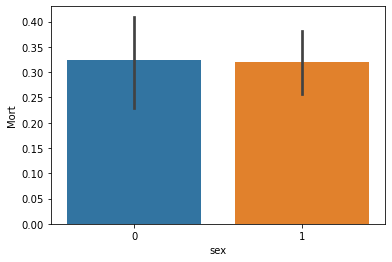

In [176]:
#impact du sex
sns.barplot(x="sex", y="Mort", data=train)

Pas significatif

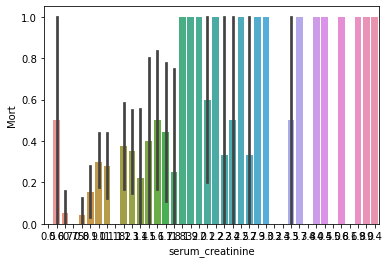

In [177]:
#impact du serum_creatinine
sns.barplot(x="serum_creatinine", y="Mort", data=train)

In [178]:
pd.qcut(train['serum_creatinine'], 4)

0        (1.4, 9.4]
1        (0.9, 1.1]
2        (1.1, 1.4]
3        (1.4, 9.4]
4        (1.4, 9.4]
           ...     
294      (0.9, 1.1]
295      (1.1, 1.4]
296    (0.499, 0.9]
297      (1.1, 1.4]
298      (1.4, 9.4]
Name: serum_creatinine, Length: 299, dtype: category
Categories (4, interval[float64]): [(0.499, 0.9] < (0.9, 1.1] < (1.1, 1.4] < (1.4, 9.4]]

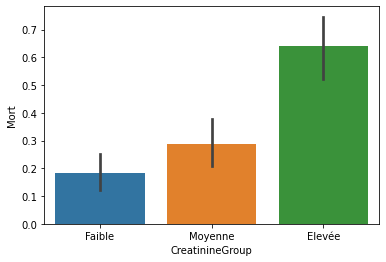

In [179]:
#classer par catégories
train["serum_creatinine"] = train["serum_creatinine"]

bins = [0.499, 1, 1.5,np.inf]
labels = ['Faible', 'Moyenne', 'Elevée']
train['CreatinineGroup'] = pd.cut(train["serum_creatinine"], bins, labels = labels)

#draw a bar plot of Age vs Deaths
sns.barplot(x="CreatinineGroup", y="Mort", data=train)
plt.show()

Il y'a un rapport très clair entre le taux de créatinine dans le sang et la mort du patient

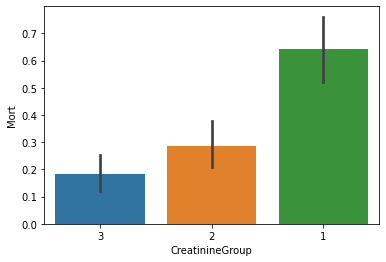

In [180]:
#Formalisation 
train['CreatinineGroup']=train['CreatinineGroup'].map({'Faible':3, 'Moyenne':2, 'Elevée':1})
sns.barplot(x="CreatinineGroup", y="Mort", data=train)
plt.show()

In [181]:
#Impact de l'age
train['age'].isna().sum()

0

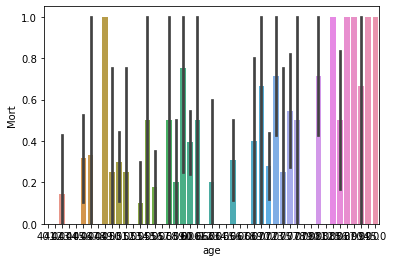

In [182]:
sns.barplot(x="age", y="Mort", data=train)

In [183]:
pd.qcut(train['age'], 6)

0        (72.0, 95.0]
1        (50.0, 55.0]
2        (60.0, 65.0]
3      (39.999, 50.0]
4        (60.0, 65.0]
            ...      
294      (60.0, 65.0]
295      (50.0, 55.0]
296    (39.999, 50.0]
297    (39.999, 50.0]
298    (39.999, 50.0]
Name: age, Length: 299, dtype: category
Categories (6, interval[float64]): [(39.999, 50.0] < (50.0, 55.0] < (55.0, 60.0] < (60.0, 65.0] < (65.0, 72.0] < (72.0, 95.0]]

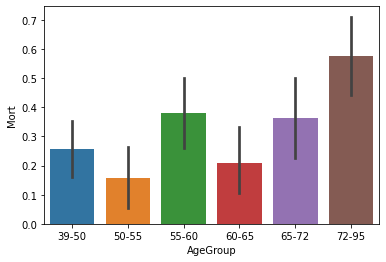

In [184]:
#classer les ages par catégories
train["age"] = train["age"]

bins = [39, 50, 55, 60, 65, 72, np.inf]
labels = ['39-50', '50-55', '55-60', '60-65', '65-72', '72-95']
train['AgeGroup'] = pd.cut(train["age"], bins, labels = labels)

#draw a bar plot of Age vs Deaths
sns.barplot(x="AgeGroup", y="Mort", data=train)
plt.show()

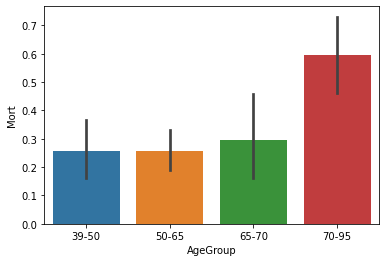

In [185]:
#L'impact e l'age n'était pas tellement significatif, nous allons revoir le regroupement
train["age"] = train["age"]

bins = [39, 50, 65, 70, np.inf]
labels = ['39-50', '50-65', '65-70', '70-95']
train['AgeGroup'] = pd.cut(train["age"], bins, labels = labels)

#draw a bar plot of Age vs Deaths
sns.barplot(x="AgeGroup", y="Mort", data=train)
plt.show()

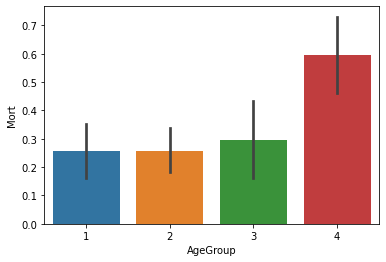

In [186]:
train['AgeGroup']=train['AgeGroup'].map({'39-50':1, '50-65':2, '65-70':3, '70-95':4})
sns.barplot(x="AgeGroup", y="Mort", data=train)
plt.show()

In [187]:
train.sample(4)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Mort,CreatinineGroup,AgeGroup
140,80.0,0,805,0,38,0,263358.03,1.1,134,1,0,109,1,2,4
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1,2,2
246,55.0,0,2017,0,25,0,314000.00,1.1,138,1,0,214,1,2,2
192,50.0,1,121,1,40,0,260000.00,0.7,130,1,0,175,0,3,1


# Décomposition de l'échantillon

In [188]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Mort'], axis=1)
target = train["Mort"]

In [189]:
predictors.shape

(299, 14)

Nous gardons 20 % de notre échantillon train qui est labelisé pour evaluer la performance de notre modèle

In [190]:
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.2, random_state = 0)

# Modélisation / Prédiction

In [191]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

cls=GradientBoostingClassifier().fit(x_train,y_train)

cls.score(x_val,y_val)

0.8333333333333334

In [192]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier(max_depth=12,n_estimators=300).fit(x_train,y_train)

cls.score(x_val,y_val)

0.8666666666666667

In [193]:
import pickle
# save the model to disk
filename = 'cls_heart_attack.pkl'
pickle.dump(cls, open(filename, 'wb'))

In [194]:
#Matrice de confusion
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val,cls.predict(x_val))


array([[36,  1],
       [ 7, 16]], dtype=int64)

6 faux positifs et 1 faux négatifs